In [1]:
import numpy as np
import pandas as pd
import random

In [2]:
import distances #euclidean_distance(X, Y) cosine_distance(X, Y)
import nearest_neighbors #KNNClassifier init(k, strategy, metric, weights, test_block_size) fit(X, y) 
                         #find_kneighbors(X, return_distance) predict(X)
import cross_validation #knn_cross_val_score(X, y, k_list, score, cv, **kwargs)

In [3]:
train = pd.read_csv("mnist_train.csv")
test = pd.read_csv("mnist_test.csv")

In [4]:
X_train = np.array(train.iloc[:, 1:])
y_train = np.array(train.iloc[:, :1])
X_test = np.array(test.iloc[:, 1:])
y_test = np.array(test.iloc[:, :1])

In [5]:
print(X_train.shape, y_train.shape)
print(X_test.shape, y_test.shape)

(59999, 784) (59999, 1)
(9999, 784) (9999, 1)


In [123]:
X_train = np.array(train.iloc[:8000, 1:])
y_train = np.array(train.iloc[:8000, :1])
X_test = np.array(test.iloc[:1670, 1:])
y_test = np.array(test.iloc[:1670, :1])

In [12]:
k = 5
test_block_size = 20
test_block = random.sample(range(X_train.shape[1]), test_block_size)
print(test_block)

print(X_test.shape)
print(X_train.shape)
print(y_test.shape)
print(y_train.shape)

X_tst = np.array([X_test[:, i] for i in test_block]).T
X_tr = np.array([X_train[:, i] for i in test_block]).T

print(X_test.shape, X_tst.shape)
print(X_train.shape, X_tr.shape)

[201, 500, 246, 114, 30, 277, 286, 758, 27, 762, 399, 204, 469, 298, 749, 579, 46, 94, 773, 219]
(9999, 784)
(59999, 784)
(9999, 1)
(59999, 1)
(9999, 784) (9999, 20)
(59999, 784) (59999, 20)


In [7]:
cls = nearest_neighbors.KNNClassifier(k=k, strategy='my_own', metric='euclidean', weights=False, test_block_size=test_block_size)
cls.fit(X_tr, y_train)
%time ind_my = cls.find_kneighbors(X_tst, return_distance=False)

KeyboardInterrupt: 

In [13]:
cls = nearest_neighbors.KNNClassifier(k=k, strategy='kd_tree', metric='euclidean', weights=False, test_block_size=test_block_size)
cls.fit(X_tr, y_train)
%time ind_kd = cls.find_kneighbors(X_tst, return_distance=False)

Wall time: 31.6 s


In [144]:
ind_kd.shape

(9999, 5)

In [15]:
cls = nearest_neighbors.KNNClassifier(k=k, strategy='brute', metric='euclidean', weights=False, test_block_size=test_block_size)
cls.fit(X_tr, y_train)
%time ind_br = cls.find_kneighbors(X_tst, return_distance=False)

MemoryError: Unable to allocate array with shape (2236, 59999) and data type float64

In [16]:
cls = nearest_neighbors.KNNClassifier(k=k, strategy='ball_tree', metric='euclidean', weights=False, test_block_size=test_block_size)
cls.fit(X_tr, y_train)
%time ind_bl = cls.find_kneighbors(X_tst, return_distance=False)

Wall time: 1min 6s


In [100]:
print(sum(ind_my != ind_br), sum(ind_my != ind_kd), sum(ind_my != ind_bl))

[50 58 67 72 70] [54 62 66 65 70] [57 66 66 63 70]


In [106]:
print(sum(ind_my != ind_br), sum(ind_my != ind_kd), sum(ind_my != ind_bl))

[48 57 61 61 57] [48 33 63 55 58] [47 31 58 57 50]


In [112]:
print(sum(ind_my != ind_br), sum(ind_my != ind_kd), sum(ind_my != ind_bl))

[0 0 0 0 0] [0 0 0 0 0] [0 0 0 0 0]


In [119]:
print(sum(ind_my != ind_br), sum(ind_my != ind_kd), sum(ind_my != ind_bl))

[0 0 0 0 0] [0 0 0 0 0] [0 0 0 0 0]


In [134]:
cls = KNNClassifier(k=k, strategy='my_own', metric='euclidean', weights=False, test_block_size=test_block_size)
cls.fit(X_train, y_train)
%time ind_my = cls.find_kneighbors(X_test, return_distance=False)

Wall time: 17min 14s


In [135]:
ind_my.shape

(1670, 5)

In [141]:
X_train.shape

(59999, 784)

In [142]:
X_test.shape

(9999, 784)

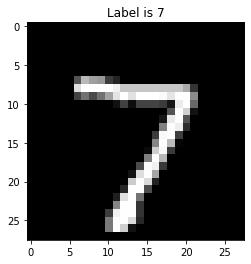

In [13]:
import numpy as np
import csv
import matplotlib.pyplot as plt
with open('mnist_test.csv', 'r') as csv_file:
    for data in csv.reader(csv_file):
    # The first column is the label
        label = data[0]
        # The rest of columns are pixels
        pixels = data[1:]
        # Make those columns into a array of 8-bits pixels
        # This array will be of 1D with length 784
        # The pixel intensity values are integers from 0 to 255
        pixels = np.array(pixels, dtype=int)
        # Reshape the array into 28 x 28 array (2-dimensional array)
        pixels = pixels.reshape((28, 28))
        # Plot
        plt.title('Label is {label}'.format(label=label))
        plt.imshow(pixels, cmap='gray')
        plt.show()
        break # This stops the loop, I just want to see one